#### Betting on the World Series. 
##### You are a broker; your job is to accommodate your client’s wishes without placing any of your personal capital at risk. Your client wishes to place an even \$1,000 bet on the outcome of the World Series, which is a baseball contest decided in favor of whichever of two teams first wins 4 games. That is, the client deposits his \$1,000 with you in advance of the series. At the end of the series he must receive from you either \$2,000 if his team wins, or nothing if his team loses. No market exists for bets on the entire world series. However, you can place even bets, in any amount, on each game individually. What is your strategy for placing bets on the individual games in order to achieve the cumulative result demanded by your client?

##### I always bet on my client's team - team A - using their money only (1 unit total). If A wins 4 first, I owe my client 2 units, else I owe them 0 units. For e.g. sequence AABABA, I pay my client 2. For e.g. sequence BBBAB, I pay my client 0.
##### How much I bet in any given game is defined based on possible outcomes:
##### At AABAB, either I. AABABA (2) or II. AABABB (1), with IIa. AABABBA (2) and IIb. AABABBB (0). In this example the expected pay value at II. is 1: the average of IIa. and IIb. pay. Proceeding backwards, the bet amount can be defined for all stages in the World Series. The bet value is defined as the difference between the value at the current stage and the lower expected value at the next stage. This way, if A wins the series, 2 units is the final value by construction. Else, we ensure that we never lose more than the starting unit.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import networkx as nx

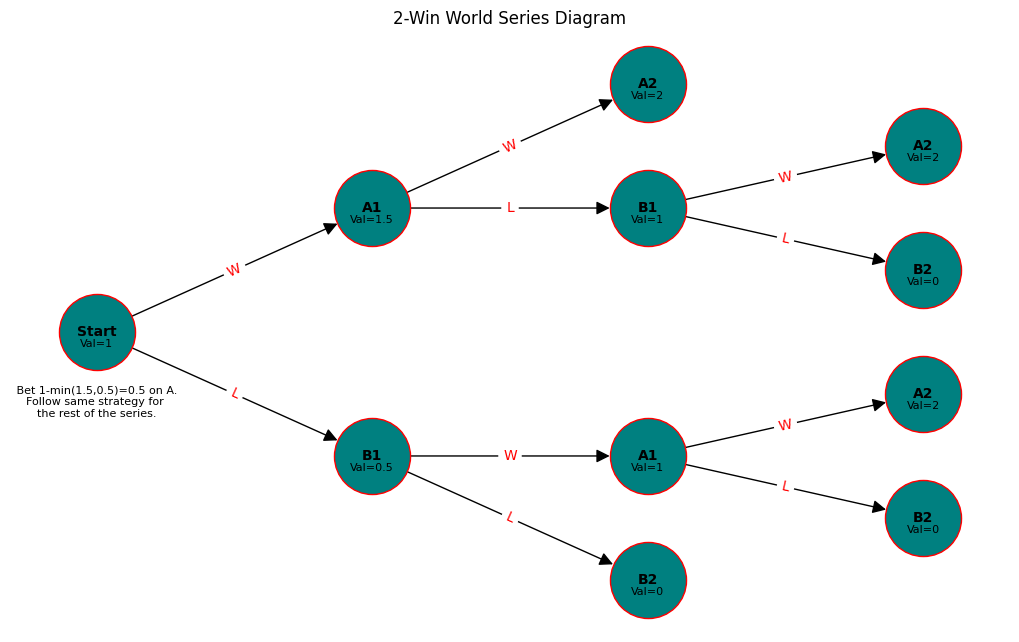

In [74]:
# I demonstrate the result for a 2-win world series for simplicity. First diagrammatically, then plotting the balance evolution.

G = nx.DiGraph()

# Define the nodes and edges for a 2-win world series
nodes = ['Start', 'A1', 'B1', 'A2', 'B2', 'A1_2', 'B1_2', 'A2_2', 'B2_2', 'A2_3', 'B2_3']
edges = [('Start', 'A1', 'W'), ('Start', 'B1', 'L'), 
         ('A1', 'A2', 'W'), ('A1', 'B1_2', 'L'), 
         ('B1', 'A1_2', 'W'), ('B1', 'B2', 'L'),
         ('B1_2', 'A2_2', 'W'), ('B1_2', 'B2_2', 'L'),
         ('A1_2', 'A2_3', 'W'), ('A1_2', 'B2_3', 'L')]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from([(u, v) for u, v, _ in edges])

# Define positions for a left-to-right layout
pos = {
    'Start': (0, 0),
    'A1': (1, 0.5),
    'B1': (1, -0.5),
    'A2': (2, 1),
    'B1_2': (2, 0.5),
    'A1_2': (2, -0.5),
    'B2': (2, -1),
    'A2_2': (3, 0.75),
    'B2_2': (3, 0.25),
    'A2_3': (3, -0.25),
    'B2_3': (3, -0.75)
}

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, labels={node: node[:-2] if '_' in node else node for node in nodes}, node_size=3000, node_color='teal', font_size=10, font_weight='bold', font_color='black',edgecolors='red', arrowsize=20)

# Define and draw edge labels
edge_labels = {(u, v): label for u, v, label in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

custom_labels = {
    'Start': '\n\n\n\n\n\n\n\nVal=1\n\n\n\n Bet 1-min(1.5,0.5)=0.5 on A. \nFollow same strategy for \nthe rest of the series.',
    'A1': '\n\nVal=1.5',
    'B1': '\n\nVal=0.5',
    'A2': '\n\nVal=2',
    'B2': '\n\nVal=0',
    'A1_2': '\n\nVal=1',
    'B1_2': '\n\nVal=1',
    'A2_2': '\n\nVal=2',
    'B2_2': '\n\nVal=0',
    'A2_3': '\n\nVal=2',
    'B2_3': '\n\nVal=0'
}

# Draw custom labels
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=8, font_color='black')

plt.title('2-Win World Series Diagram')
plt.show()

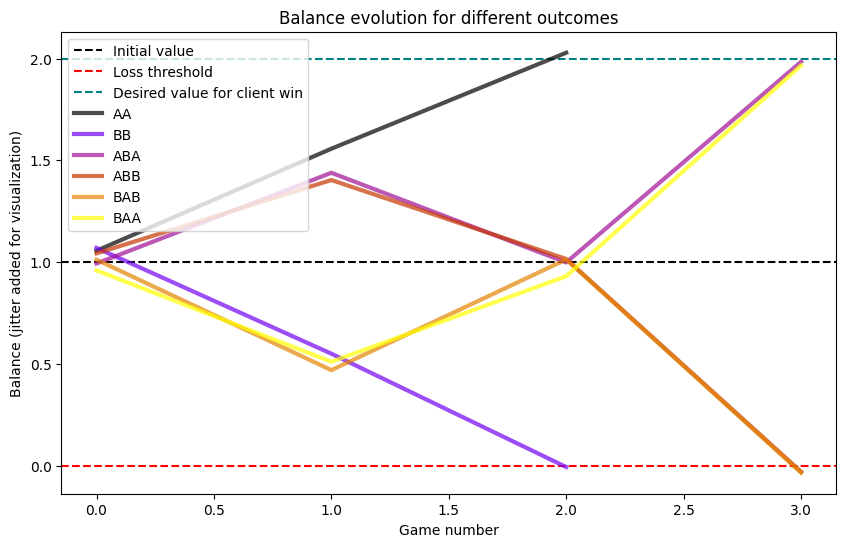

In [75]:
# Define broker balance evolutions for each scenario, assuming a 1 unit start (client's money)
balance_evolutions = {
    'AA': [1, 1.5, 2],
    'BB': [1, 0.5, 0],
    'ABA': [1, 1.5, 1, 2],
    'ABB': [1, 1.5, 1, 0],
    'BAB': [1, 0.5, 1, 0],
    'BAA': [1, 0.5, 1, 2]
}
balance_evolutions_list = list(balance_evolutions.values())
number_of_outcomes = len(balance_evolutions_list)

# Plot balance evolution with specified colors and added noise
colors = plt.cm.gnuplot(np.linspace(0, 1, number_of_outcomes))
noise_strength = 0.05

plt.figure(figsize=(10, 6))
plt.axhline(y=1, color='black', linestyle='--', label='Initial value')
plt.axhline(y=0, color='red', linestyle='--', label='Loss threshold')
plt.axhline(y=2, color='teal', linestyle='--', label='Desired value for client win')
for i, evolution in enumerate(balance_evolutions_list):
    noisy_evolution = np.array(evolution) + np.random.normal(0, noise_strength, len(evolution))
    plt.plot(noisy_evolution, alpha=0.7, linewidth=3, color=colors[i], label=list(balance_evolutions.keys())[i])

plt.title('Balance evolution for different outcomes')
plt.xlabel('Game number')
plt.ylabel('Balance (jitter added for visualization)')
plt.legend()
plt.show()